# ASSIGNMENT 1
Using Keras to build a MLP for classifying the CIFAR-10 dataset. Each record is of size 1*3072. Building a MLP to classify the data into the 10 classes.

# Dataset 
CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

http://www.cs.utoronto.ca/~kriz/cifar.html

# Importing libraries

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Flatten
from keras.optimizers import RMSprop
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils import plot_model 

In [0]:
batch_size = 64
num_classes = 10
epochs = 25

# Loading the CIFAR 10 dataset

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


# The data, split between train and test sets:

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train.shape[1:]

(32, 32, 3)

# Defining the model

In [0]:
model = Sequential()

model.add(Dense(64, input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [0]:
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [0]:
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Model Summary

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 128)       8320      
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 128)       16512     
__________

# Compiling the model

In [0]:
model.compile(loss='categorical_crossentropy',

              optimizer='adam',

              metrics=['accuracy'])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Fitting the model

In [14]:
mlp = model.fit(x_train, y_train,

                    batch_size=batch_size,

                    epochs=epochs,

                    verbose=1,

                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 61s 1ms/step - loss: 1.6500 - acc: 0.4183 - val_loss: 1.4974 - val_acc: 0.4681
Epoch 2/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.4527 - acc: 0.4914 - val_loss: 1.4474 - val_acc: 0.4863
Epoch 3/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.3871 - acc: 0.5176 - val_loss: 1.4123 - val_acc: 0.5061
Epoch 4/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.3378 - acc: 0.5328 - val_loss: 1.4283 - val_acc: 0.5048
Epoch 5/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.2861 - acc: 0.5542 - val_loss: 1.4465 - val_acc: 0.5016
Epoch 6/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.2357 - acc: 0.5761 - val_loss: 1.4431 - val_acc: 0.5069
Epoch 7/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.1787 - acc: 0.5956 - val_loss: 1.4965 - val_acc

# Scoring and Evaluating trained model.

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 358us/step
Test loss: 2.526078281021118
Test accuracy: 0.4402


# Printing the accuracy

In [16]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 44.02%


# Plot training & validation accuracy values

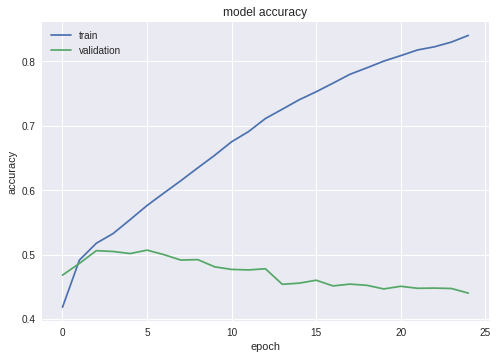

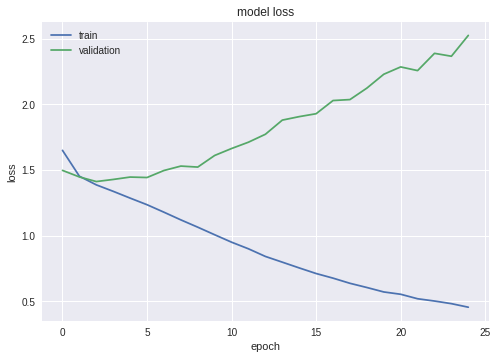

In [17]:
plt.figure()
plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(mlp.history['loss'])
plt.plot(mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [0]:
# plot graph
plot_model(model, to_file='MLP.png')

Results 1) Provide a recommendation for the best model you would recommend for classification. Which model (with parameter values) would you choose and why?
According to me, the model that worked best for MLP was model 2. It had an accuracy of 44%.The best parameters that helped improve the model are: 
epochs = 25
batch_size = 64 
keep_probability = 0.7
learning_rate = 0.001
Optimizer

• Comment on how good your model is ? Does it overfit/underfit data ? What could you do to improve the model I ran it for 60 epochs and got almost 44.02% accuracy. To improve the model the learning rate should be improved. Also, number of neurons can be more complicated for a better fit. Along with these parameters, the number of epochs can also be increased fot the model to train better.

# References
[1] https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

[2] http://www.cs.utoronto.ca/~kriz/cifar.html

[3] https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c